
___
# Logistic Regression Project 

In this project we will be working with advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [26]:
%matplotlib inline
sns.set_style('whitegrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [27]:
ad_data = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [28]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [29]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 62.5+ KB


In [30]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

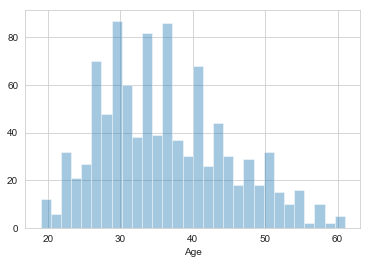

In [31]:
sns.set_style('whitegrid')
sns.distplot(ad_data['Age'], bins=30, kde=False, hist=True)

**Create a jointplot showing Area Income versus Age.**

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



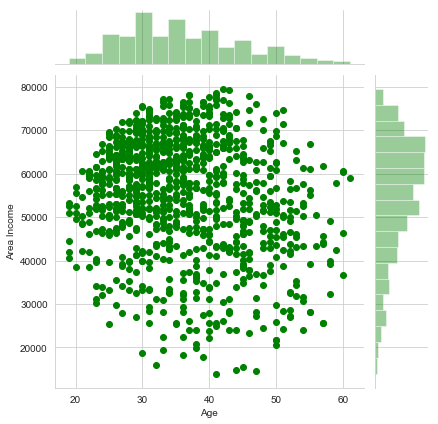

In [32]:
sns.set_style('whitegrid')
sns.jointplot(x='Age', y='Area Income', data=ad_data, color='green')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

<Figure size 864x504 with 0 Axes>

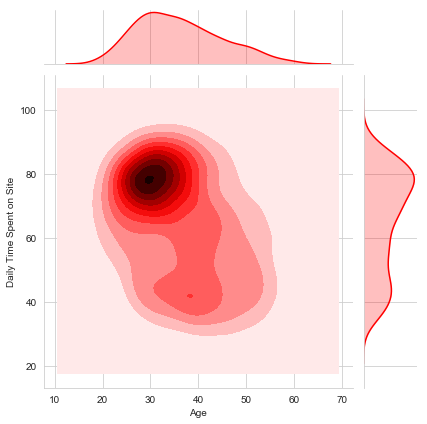

In [37]:
plt.figure(figsize=(12,7))
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



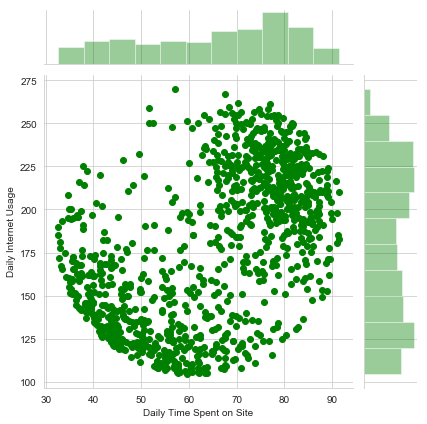

In [49]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')

In [52]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

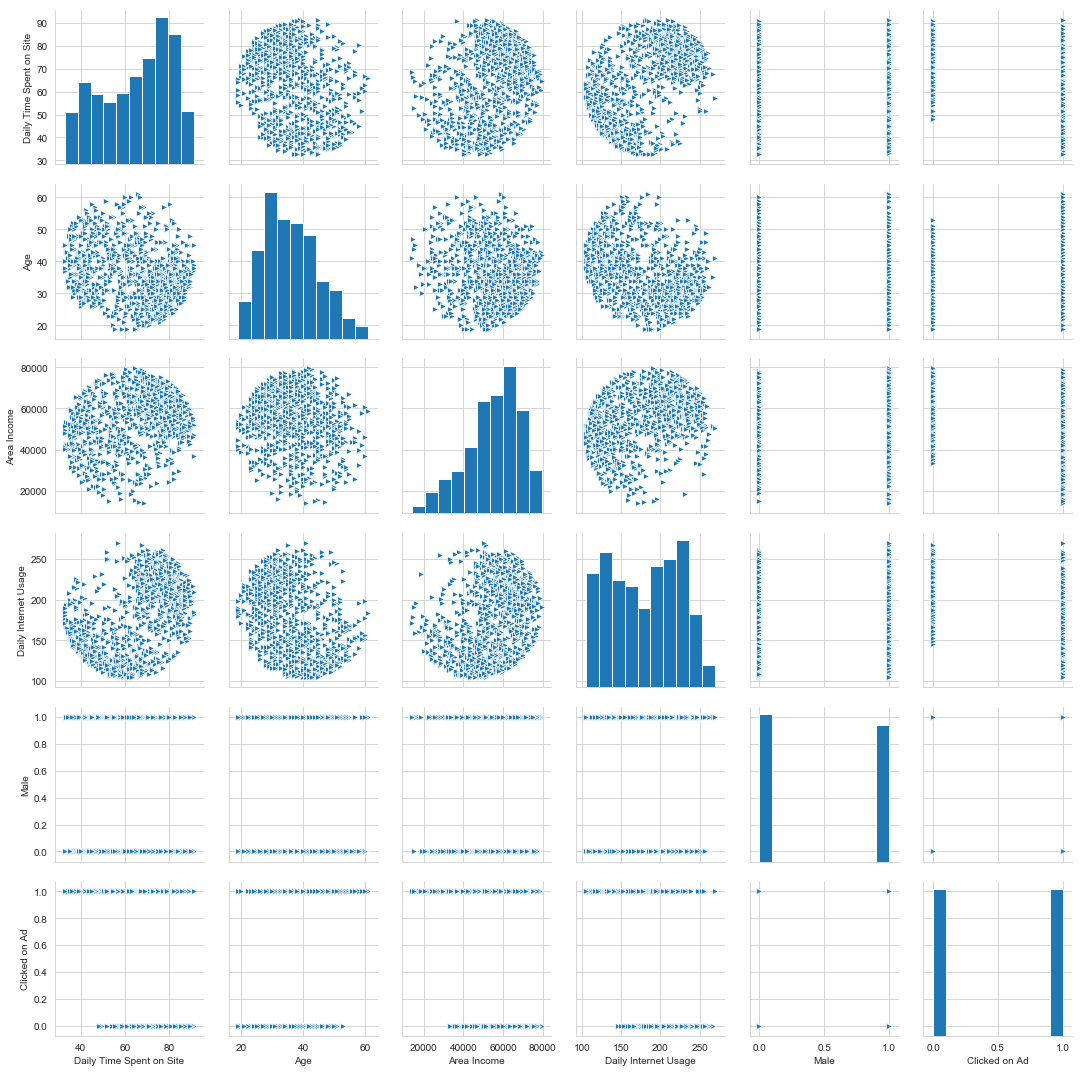

In [66]:
sns.pairplot(ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad']], palette='viridis', markers='>')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [68]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [71]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

** Train and fit a logistic regression model on the training set.**

In [73]:
lr = LogisticRegression()

In [74]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [75]:
predictions = lr.predict(X_test)

** Create a classification report for the model.**

In [89]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       186
          1       0.93      0.85      0.89       214

avg / total       0.89      0.89      0.89       400



In [105]:
data = (y_test, predictions)
data

(372    0
 968    1
 15     1
 883    1
 179    0
 794    1
 762    1
 104    0
 593    0
 23     0
 590    1
 2      0
 831    1
 919    0
 625    1
 696    1
 8      0
 217    1
 333    0
 823    0
 537    0
 5      0
 125    0
 31     0
 710    1
 628    1
 656    0
 558    0
 66     1
 719    1
       ..
 673    1
 965    1
 130    1
 107    1
 996    1
 141    1
 40     0
 279    0
 208    1
 669    1
 707    0
 644    0
 674    0
 549    0
 216    1
 211    1
 978    0
 94     1
 845    1
 661    1
 887    1
 360    1
 818    0
 744    1
 774    1
 438    1
 206    0
 24     1
 67     1
 485    1
 Name: Clicked on Ad, Length: 400, dtype: int64,
 array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0

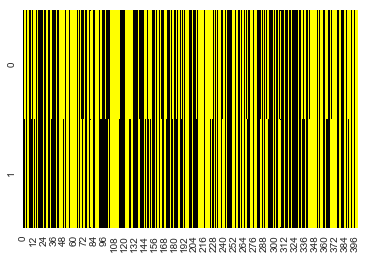

In [107]:
sns.heatmap(data, cbar=False, cmap='gnuplot')

c:\python 3.6.5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



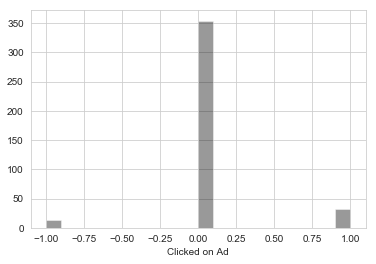

In [112]:
sns.set_style('whitegrid')
sns.distplot((y_test-predictions), kde=False, color='Black')

# Thanks for going through my project, that's it  !!